Tabel Analisis Pareto:
Defect Category  Total Percentage Cumulative Percentage
    Fuel System    320      37.9%                 37.9%
     Suspension    210      24.9%                 62.7%
          Tyres     92      10.9%                 73.6%
   Driver Error     75       8.9%                 82.5%
         Engine     60       7.1%                 89.6%
     Air System     53       6.3%                 95.9%
       Software     18       2.1%                 98.0%
     Hydraulics     13       1.5%                 99.5%
         Others      4       0.5%                100.0%




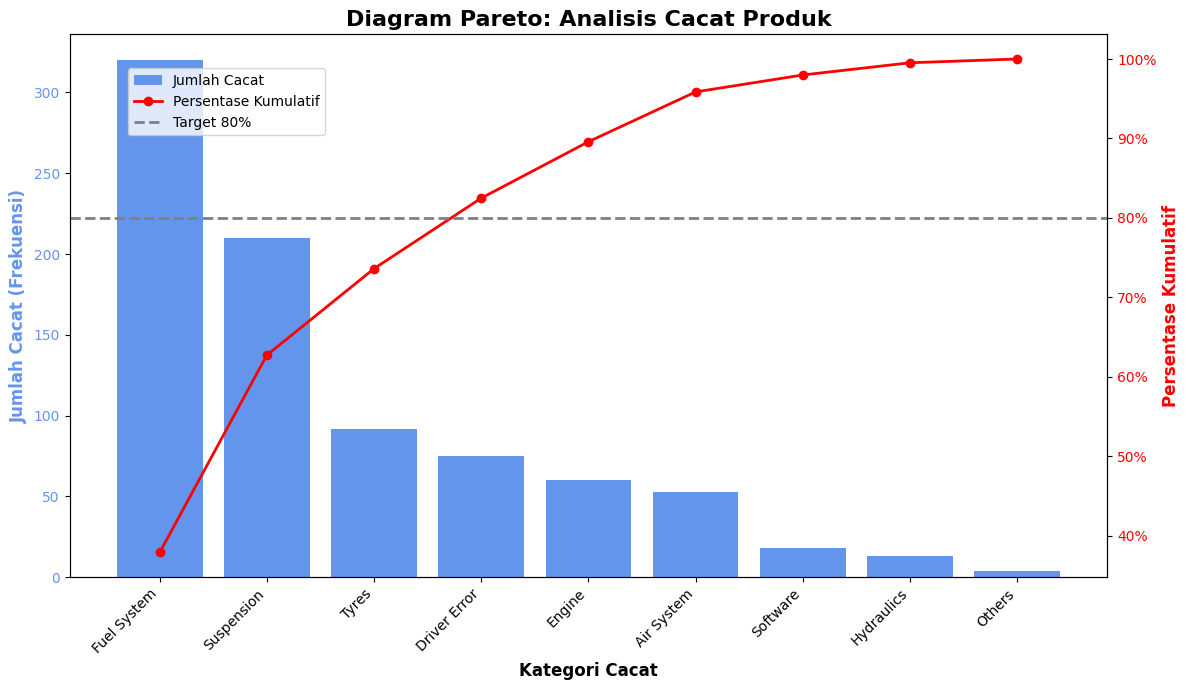

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 1. Memasukkan data dari soal
data = {
    'Defect Category': [
        'Fuel System', 'Suspension', 'Tyres', 'Driver Error',
        'Engine', 'Air System', 'Software', 'Hydraulics', 'Others'
    ],
    'Total': [320, 210, 92, 75, 60, 53, 18, 13, 4]
}

df = pd.DataFrame(data)

# 2. Mengurutkan data (meskipun sudah urut, ini adalah praktik terbaik)
df = df.sort_values(by='Total', ascending=False)

# 3. Menghitung Persentase dan Persentase Kumulatif
df['Percentage'] = (df['Total'] / df['Total'].sum())
df['Cumulative Percentage'] = df['Percentage'].cumsum()

# Menampilkan tabel perhitungan dalam format yang rapi
print("Tabel Analisis Pareto:")
df_display = df.copy()
df_display['Percentage'] = df_display['Percentage'].apply(lambda x: f"{x:.1%}")
df_display['Cumulative Percentage'] = df_display['Cumulative Percentage'].apply(lambda x: f"{x:.1%}")
print(df_display.to_string(index=False))
print("\n" + "="*50 + "\n")


# 4. Membuat Diagram Pareto (Kombinasi Bar Chart dan Line Chart)

# Menyiapkan kanvas plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Bar Chart (Frekuensi Cacat)
# Ini adalah sumbu Y utama (sebelah kiri)
ax.bar(df['Defect Category'], df['Total'], color='cornflowerblue', label='Jumlah Cacat')
ax.set_ylabel('Jumlah Cacat (Frekuensi)', color='cornflowerblue', fontsize=12, weight='bold')
ax.set_xlabel('Kategori Cacat', fontsize=12, weight='bold')
ax.set_title('Diagram Pareto: Analisis Cacat Produk', fontsize=16, weight='bold')
ax.tick_params(axis='y', labelcolor='cornflowerblue')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right") # Rotasi label X agar tidak tumpang tindih

# Membuat sumbu Y kedua (sebelah kanan) yang berbagi sumbu X
ax2 = ax.twinx()

# Plot Line Chart (Persentase Kumulatif)
# Ini adalah sumbu Y sekunder (sebelah kanan)
ax2.plot(df['Defect Category'], df['Cumulative Percentage'], color='red', marker='o', linestyle='-', linewidth=2, label='Persentase Kumulatif')
ax2.set_ylabel('Persentase Kumulatif', color='red', fontsize=12, weight='bold')
ax2.tick_params(axis='y', labelcolor='red')

# Format sumbu Y sekunder menjadi persentase
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

# Menambahkan garis bantu 80% (Prinsip Pareto)
ax2.axhline(y=0.8, color='gray', linestyle='--', linewidth=2, label='Target 80%')

# Menambahkan legenda
# Kita perlu mengambil label dari kedua axes (ax dan ax2)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Menampilkan plot
plt.tight_layout() # Merapikan layout
plt.show()